In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import os
import seaborn as sns 
#from pyabc import (Distribution, History)

In [2]:
# Experiments
outgrowth_df = pd.read_csv('./'+'outgrowth.csv')
outgrowth_df.set_index(['day', 'tail'], inplace=True)
outgrowth_mean = outgrowth_df.groupby('day').mean()['outgrowth']

percentage_df = pd.read_csv('./'+'percentage_100um.csv')
df = percentage_df
for day in range(0,6):
    df.loc[df['day'] == day, 'position'] = (outgrowth_mean[day] - (df.loc[df['day'] == day, 'position']-100)).astype(int)
percentage_df = df
percentage_df.set_index(['day', 'tail', 'position'], inplace=True)
percentage_df = percentage_df.drop(['unlabelled'], axis=1)
experiments = percentage_df

In [3]:
sp = {0:-863.0,1:-947.0,2:-754.0,3:-657.0,4:-718.0,5:-446.0}

Day 0
Green: KstestResult(statistic=0.2, pvalue=1.0)
H0: True
Magenta KstestResult(statistic=0.2, pvalue=1.0)
H0: True


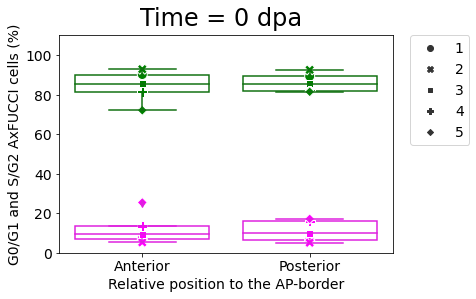

Day 1
Green: KstestResult(statistic=0.4, pvalue=0.8571428571428572)
H0: True
Magenta KstestResult(statistic=0.4666666666666667, pvalue=0.6785714285714286)
H0: True


Day 2
Green: KstestResult(statistic=0.8, pvalue=0.07936507936507936)
H0: True
Magenta KstestResult(statistic=0.4, pvalue=0.873015873015873)
H0: True


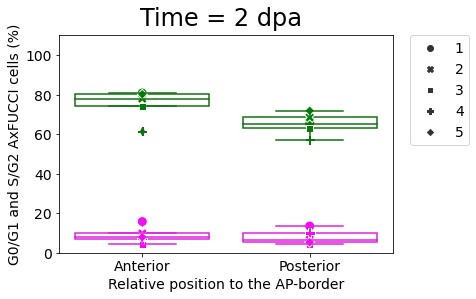

Day 3
Green: KstestResult(statistic=0.8333333333333334, pvalue=0.025974025974025972)
H0: False
Magenta KstestResult(statistic=0.6666666666666666, pvalue=0.14285714285714285)
H0: True


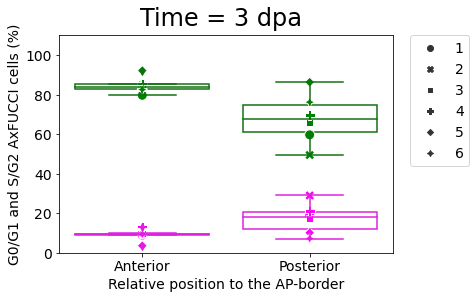

Day 4
Green: KstestResult(statistic=0.75, pvalue=0.22857142857142854)
H0: True
Magenta KstestResult(statistic=0.75, pvalue=0.22857142857142854)
H0: True


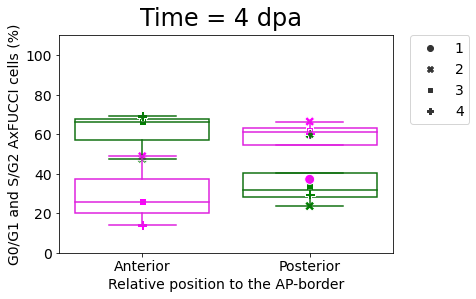

Day 5
Green: KstestResult(statistic=1.0, pvalue=0.028571428571428577)
H0: False
Magenta KstestResult(statistic=1.0, pvalue=0.028571428571428577)
H0: False


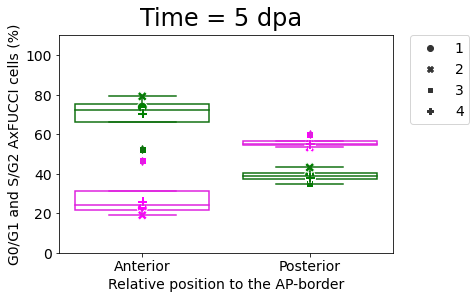

In [8]:
# Local fitting plots (green)
for day,sp_mean in sp.items():
    pos = experiments.sort_index().xs(day,level='day').groupby('position').mean().dropna().index
    data = experiments.sort_index().xs(day,level='day').reset_index().dropna()
    data['sp'] = np.where(data['position'] < sp_mean, "Anterior", "Posterior")
    data = data.groupby(["tail","sp"]).mean().drop("position",axis=1).reset_index()
    data = data.sort_values("sp")
    ax = sns.scatterplot(x='sp', y='green', data=data,color='green',edgecolor="white",linewidth=1,style='tail', s=100,legend=False)
    ax = sns.boxplot(x='sp', y='green', data=data,color='green')
    ax = sns.scatterplot(x='sp', y='magenta', data=data,color='magenta',edgecolor="white",linewidth=1,style='tail', s=100)
    ax2 = sns.boxplot(x='sp', y='magenta', data=data,color='magenta')
    
    # Kolmogorov-Smirnov statistic
    significance = 0.05
    print("Day",day)
    green   = scipy.stats.ks_2samp(data[data['sp']=='Anterior']['green'],data[data['sp']=='Posterior']['green'])
    magenta = scipy.stats.ks_2samp(data[data['sp']=='Anterior']['magenta'],data[data['sp']=='Posterior']['magenta'])
    print("Green:",green)
    print("H0:",green[1]>significance)
    print("Magenta",magenta)
    print("H0:",magenta[1]>significance)    

    for i,artist in enumerate(ax2.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax2.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
        
    title = 'Time = '+ str(day)+" dpa"
    #plt.xlim(data['position'].min()-100,data['position'].max()+100)
    plt.ylim(0,110)
    plt.xlabel('Relative position to the AP-border')
    plt.ylabel('G0/G1 and S/G2 AxFUCCI cells (%)')
    plt.suptitle(title,size='24')    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.rcParams.update({'font.size': 14})
    plt.savefig('./boxes-day_'+str(day), dpi=300, bbox_inches='tight')
    plt.show()